Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


The main goal of this project is implement a CRIPS-DM Data Science Process over the StackOverflow Data. The porpose is identify some Business Questions and dive deep into the Data.

Gathering Data

In [2]:
#Take a look at the Data dimention
df = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')
print('The interview was composed by {} questions and counted with {} interviwers'.format(schema.shape[0], df.shape[0]))

The interview was composed by 154 questions and counted with 51392 interviwers


In [3]:
#Number of columns with missing values
num_mis_val = np.sum(np.sum(df.isnull())/df.shape[0] != 0)

#Discovering the proportion of missing values
prop_mis_val = round((num_mis_val / df.shape[1]) * 100, 2)
print('The proportion of columns with at leats 1 missing values in the datafrme is {}%'.format(prop_mis_val))


The proportion of columns with at leats 1 missing values in the datafrme is 95.45%


In [4]:
#Columns with more than 75% of missing values 
df.columns[(df.isnull().mean() > .50)]

Index(['YearsCodedJobPast', 'WebDeveloperType', 'MobileDeveloperType',
       'NonDeveloperType', 'ExCoderReturn', 'ExCoderNotForMe',
       'ExCoderBalance', 'ExCoder10Years', 'ExCoderBelonged', 'ExCoderSkills',
       'ExCoderWillNotCode', 'ExCoderActive', 'HoursPerWeek',
       'AssessJobIndustry', 'AssessJobRole', 'AssessJobExp', 'AssessJobDept',
       'AssessJobTech', 'AssessJobProjects', 'AssessJobCompensation',
       'AssessJobOffice', 'AssessJobCommute', 'AssessJobRemote',
       'AssessJobLeaders', 'AssessJobProfDevel', 'AssessJobDiversity',
       'AssessJobProduct', 'AssessJobFinances', 'JobProfile', 'ResumePrompted',
       'LearnedHiring', 'Currency', 'Overpaid', 'EducationImportant',
       'TimeAfterBootcamp', 'CousinEducation', 'HaveWorkedFramework',
       'WantWorkFramework', 'WantWorkDatabase', 'MetricAssess',
       'InfluenceWorkstation', 'InfluenceHardware', 'InfluenceServers',
       'InfluenceTechStack', 'InfluenceDeptTech', 'InfluenceVizTools',
       'Influe

In [5]:
#The categorical values are
df.select_dtypes(include=['object']).head()

,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,...,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers
0,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,...,Strongly agree,Strongly agree,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree
1,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,"Privately-held limited company, not in startup...",...,Strongly agree,Strongly agree,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree
2,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",Publicly-traded corporation,...,Agree,Agree,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree
3,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",Non-profit/non-governmental organization or pr...,...,Agree,Strongly agree,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree
4,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,"Privately-held limited company, not in startup...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Lets take a look and compare some aspects between a developed country and an emergin country. In this case we are going to analyse the US and Brasil about some aspects.

In [6]:
#The first question of interest
schema[schema['Column'] == 'EmploymentStatus']['Question']

5    Which of the following best describes your cur...
Name: Question, dtype: object

Data Understanding

In [7]:
#Counts of null values in EmploymentStatus Column
df['EmploymentStatus'].isnull().sum() / df.shape[0]

0.0

In [8]:
#The proportion of the EmploymentStatus can be seen below
dev_type_prop = df['EmploymentStatus'].value_counts() / df.shape[0]
dev_type_prop[:10]


Employed full-time                                      0.703378
Independent contractor, freelancer, or self-employed    0.101825
Employed part-time                                      0.061877
Not employed, and not looking for work                  0.054308
Not employed, but looking for work                      0.054211
I prefer not to say                                     0.021132
Retired                                                 0.003269
Name: EmploymentStatus, dtype: float64

<AxesSubplot:>

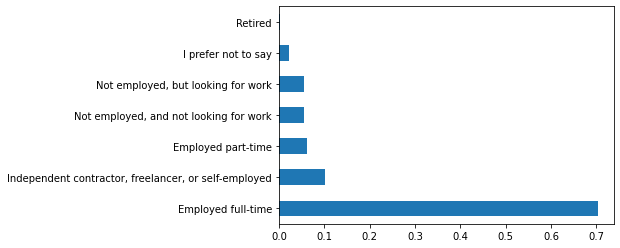

In [9]:
dev_type_prop.plot(kind='barh')

In [10]:
#Employment Levels for analysis
emp_levels = list(df['EmploymentStatus'].unique())
emp_levels.remove('Retired') #Remove Retired was necessary, because there are any retired in brazilian's answers
emp_levels

['Not employed, and not looking for work',
 'Employed part-time',
 'Employed full-time',
 'Independent contractor, freelancer, or self-employed',
 'Not employed, but looking for work',
 'I prefer not to say']

How is the Emplyment Status of each country?

In [11]:
#Take a look into brazilian employment status in absolute terms
br = df.loc[df['Country'] == 'Brazil']['EmploymentStatus'].value_counts()
br

Employed full-time                                      513
Independent contractor, freelancer, or self-employed    111
Employed part-time                                       63
Not employed, but looking for work                       51
Not employed, and not looking for work                   31
I prefer not to say                                       8
Name: EmploymentStatus, dtype: int64

In [12]:
#Take a look into american employment status in absolute terms
us = df.loc[df['Country'] == 'United States']['EmploymentStatus'].value_counts()
us

Employed full-time                                      8786
Independent contractor, freelancer, or self-employed     773
Employed part-time                                       598
Not employed, and not looking for work                   536
Not employed, but looking for work                       527
I prefer not to say                                      177
Retired                                                   58
Name: EmploymentStatus, dtype: int64

In [13]:
print('The first observation is about the representative of Brazil in comparison to US. Only {} brazilian answers against {} americans'.format(br.sum(),us.sum()))

The first observation is about the representative of Brazil in comparison to US. Only 777 brazilian answers against 11455 americans


In [14]:
#Puting all togheter in a Data Frame
contries = ['Brazil', 'United States']
def emp_country(DF):
    """
    INPUT: Dataframe
    
    OUTPUT: A new dataframe with brazilain and american employment status and their's respective values
    """
    temp = pd.DataFrame()
    df = DF.copy()
    for i in contries:
        
        Country = df.loc[df['Country'] == i]
        prop = Country['EmploymentStatus'].value_counts() / Country.shape[0]
        temp[i] = prop
 
    return temp

In [15]:
#Compiled data
emp_country(df)

,Brazil,United States
Employed full-time,0.660232,0.767001
"Independent contractor, freelancer, or self-employed",0.142857,0.067481
Employed part-time,0.081081,0.052204
"Not employed, but looking for work",0.065637,0.046006
"Not employed, and not looking for work",0.039897,0.046792
I prefer not to say,0.010296,0.015452


<AxesSubplot:title={'center':'Employment Status by Country'}>

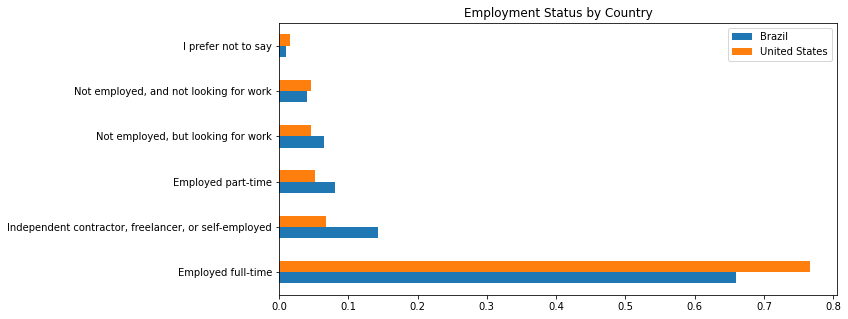

In [16]:
#Plot with the results above
emp_country(df).plot(kind='barh', figsize=(10,5), title='Employment Status by Country')

From the plot above it is possible to say that in relative terms the US outweigh Brazil in Employed Full-time, Not Employed, and not looking for work and I prefer not to say. While in Brazil is more representative in the others levels. The major difference is in Independent contractor, freelancer or self-employed. In Brazil it is in the second position with 14,28% while in US this is only 6,74%. 

How the developers learn in these two countries?

In [17]:
#Spliting the multiples answers with more them one kind of education type and counting the unique values for each country

from collections import Counter as ct

def cl_df(DF,col,ref):
    """
    INPUT:
    DF: The general dataframe
    col: Column of interest with the data to be analysed 
    ref: Reference of Country, used to filter the general dataframe
    
    OUTPUT:
    New dataframe with each line with the sum of each possible value for the respective col
    
    """
    
    split_list = []
    df = DF.loc[DF['Country'] == ref]
    df = df[col].dropna()
    df = df.reset_index()
    df = df[col].str.split(";")   
    
    for i in range(0, len(df)):        
        split_list += (df[i])
        
    for i in range(0 , len(split_list)):
        split_list[i] = split_list[i].strip()

    final_list = list(set(split_list))

       
    Counter_list = ct(split_list)
    new_df = pd.DataFrame({col:Counter_list.keys(),str(ref):Counter_list.values()})
    
    return new_df





In [18]:
#Brazilian education
bra_education = cl_df(df,'EducationTypes', 'Brazil')
bra_education.set_index('EducationTypes').sort_values(by=['Brazil'],ascending=False)
bra_education['Brazil'] = bra_education['Brazil'] / bra_education['Brazil'].sum()
bra_education.sort_values(by=['Brazil'],ascending=False, inplace=True)
bra_education

,EducationTypes,Brazil
2,Self-taught,0.277814
0,Online course,0.195498
5,Open source contributions,0.117042
4,On-the-job training,0.116399
1,Part-time/evening course,0.090675
3,Coding competition,0.067524
7,Hackathon,0.058521
6,Industry certification,0.056592
8,Bootcamp,0.019936


In [19]:
#American education
us_education = cl_df(df,'EducationTypes', 'United States')
us_education.set_index('EducationTypes').sort_values(by=['United States'],ascending=False)
us_education['United States'] = us_education['United States'] / us_education['United States'].sum()
us_education.sort_values(by=['United States'],ascending=False, inplace=True)
us_education

,EducationTypes,United States
4,Self-taught,0.289357
3,On-the-job training,0.152750
0,Online course,0.146470
1,Open source contributions,0.128008
6,Hackathon,0.086407
5,Coding competition,0.072835
8,Industry certification,0.046870
2,Part-time/evening course,0.045648
7,Bootcamp,0.031654


As the comparison indicates, in the first position for both countries, the main way for learn in this field is self-taught independing of the country. However the position of the others education types revel that there are some important differences and that reflects the Employment Status analysis. The US labor market is stronger and  gives more oportunities to people learn from On-the-job training, while in Brazil it appears only in forth position. 

In [20]:
#Compiled data
comparative = pd.merge(bra_education,us_education, on='EducationTypes', how='inner').set_index('EducationTypes')
comparative.sort_values(by=['Brazil'],ascending=False, inplace=True)
comparative

,Brazil,United States
EducationTypes,,
Self-taught,0.277814,0.289357
Online course,0.195498,0.146470
Open source contributions,0.117042,0.128008
On-the-job training,0.116399,0.152750
Part-time/evening course,0.090675,0.045648
Coding competition,0.067524,0.072835
Hackathon,0.058521,0.086407
Industry certification,0.056592,0.046870
Bootcamp,0.019936,0.031654


<AxesSubplot:ylabel='EducationTypes'>

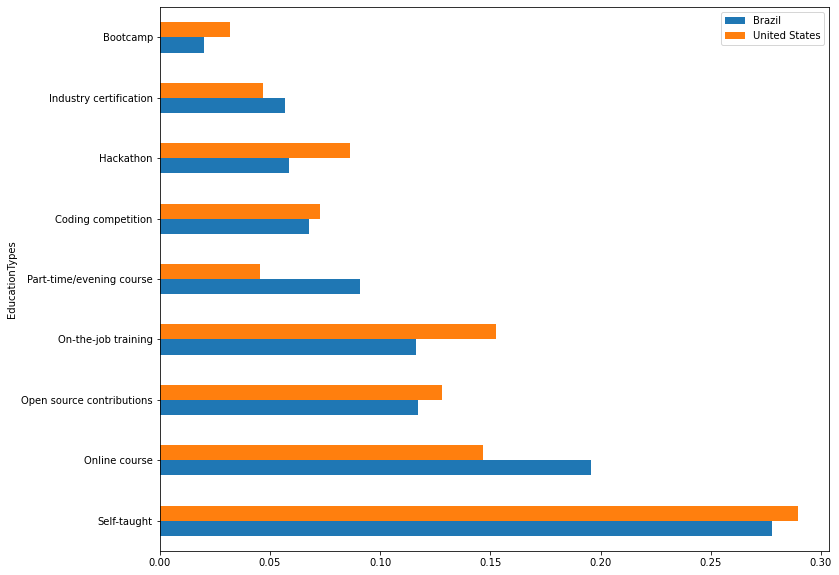

In [37]:
#Plot with the results above
comparative.plot(kind='barh', figsize=(12,10))

There are some ways to learn, but all of them will reflects in the is Years of Programing. How experienced are the programmers in these two countries?

In [22]:
df.loc[df['Country'] == 'Brazil']['YearsProgram'].value_counts()

20 or more years    85
9 to 10 years       63
5 to 6 years        62
6 to 7 years        55
4 to 5 years        55
3 to 4 years        52
7 to 8 years        48
2 to 3 years        40
11 to 12 years      38
14 to 15 years      35
8 to 9 years        34
1 to 2 years        33
15 to 16 years      32
10 to 11 years      32
12 to 13 years      22
16 to 17 years      20
13 to 14 years      16
Less than a year    16
17 to 18 years      15
19 to 20 years      15
18 to 19 years       7
Name: YearsProgram, dtype: int64

How experienced are the programmers in both countries?

In [23]:
#Proportion of Brazilian sample about YearsProgram
bra_years_prog = cl_df(df,'YearsProgram','Brazil')
bra_years_prog['Brazil'] = bra_years_prog['Brazil'] / bra_years_prog['Brazil'].sum()
bra_years_prog.sort_values(by='Brazil', ascending=False, inplace=True)
bra_years_prog

,YearsProgram,Brazil
12,20 or more years,0.109677
6,9 to 10 years,0.081290
0,5 to 6 years,0.080000
8,6 to 7 years,0.070968
2,4 to 5 years,0.070968
16,3 to 4 years,0.067097
1,7 to 8 years,0.061935
13,2 to 3 years,0.051613
4,11 to 12 years,0.049032
5,14 to 15 years,0.045161


In [24]:
#Proportion of US sample about YearsProgram
us_years_prog = cl_df(df,'YearsProgram','United States')
us_years_prog['United States'] = us_years_prog['United States'] / us_years_prog['United States'].sum()
us_years_prog.sort_values(by='United States', ascending=False, inplace=True)
us_years_prog

,YearsProgram,United States
5,20 or more years,0.256534
10,4 to 5 years,0.067707
7,3 to 4 years,0.065866
6,5 to 6 years,0.061130
2,9 to 10 years,0.054113
0,2 to 3 years,0.050956
18,6 to 7 years,0.046045
1,14 to 15 years,0.040519
11,1 to 2 years,0.040344
13,10 to 11 years,0.037625


In [25]:
#Compiled data
years_prog = pd.merge(bra_years_prog, us_years_prog, on='YearsProgram', how='inner').set_index('YearsProgram')
years_prog

,Brazil,United States
YearsProgram,,
20 or more years,0.109677,0.256534
9 to 10 years,0.081290,0.054113
5 to 6 years,0.080000,0.061130
6 to 7 years,0.070968,0.046045
4 to 5 years,0.070968,0.067707
3 to 4 years,0.067097,0.065866
7 to 8 years,0.061935,0.037625
2 to 3 years,0.051613,0.050956
11 to 12 years,0.049032,0.025434


In [26]:
years_prog.index

Index(['20 or more years', '9 to 10 years', '5 to 6 years', '6 to 7 years',
       '4 to 5 years', '3 to 4 years', '7 to 8 years', '2 to 3 years',
       '11 to 12 years', '14 to 15 years', '8 to 9 years', '1 to 2 years',
       '15 to 16 years', '10 to 11 years', '12 to 13 years', '16 to 17 years',
       '13 to 14 years', 'Less than a year', '17 to 18 years',
       '19 to 20 years', '18 to 19 years'],
      dtype='object', name='YearsProgram')

<AxesSubplot:ylabel='YearsProgram'>

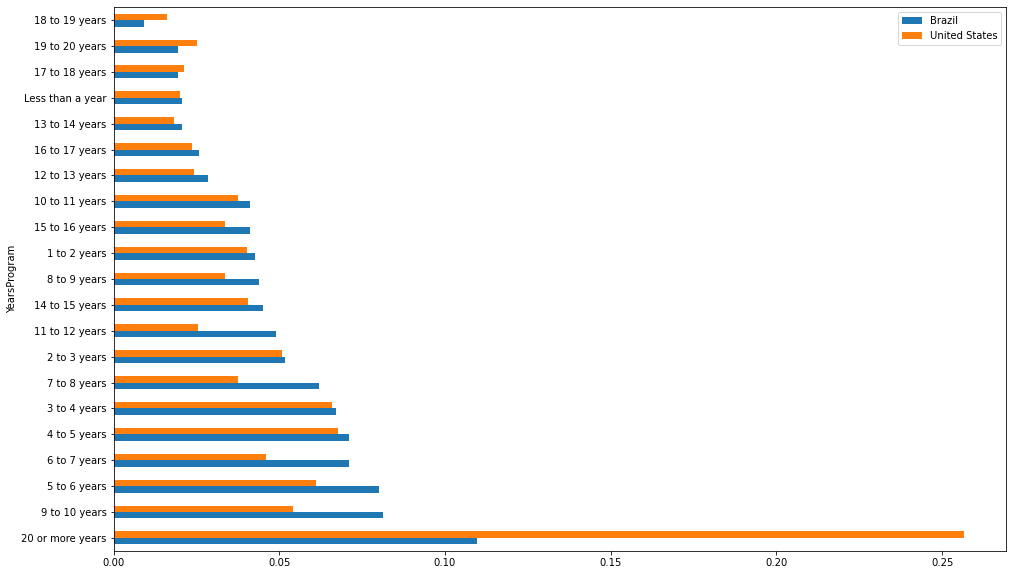

In [27]:
#Plot with the results above
years_prog.plot(kind='barh', figsize=(16,10))

The main difference appears when we talk about people with more than 20 years of programming. The US has more than double than Brazil. The other levels has a little vantage for Brazil. 

Which developer type is more representative in each country?

In [28]:
#Developer Type
bra_dev_type = cl_df(df, 'DeveloperType', 'Brazil')
bra_dev_type['Brazil'] = bra_dev_type['Brazil'] / bra_dev_type['Brazil'].sum()
bra_dev_type.sort_values(by='Brazil', ascending=False, inplace=True)
bra_dev_type

,DeveloperType,Brazil
0,Web developer,0.333102
3,Desktop applications developer,0.143255
1,Mobile developer,0.134910
6,Database administrator,0.066064
8,Systems administrator,0.059110
9,Embedded applications/devices developer,0.051460
4,DevOps specialist,0.046592
12,Data scientist,0.041725
5,Developer with a statistics or mathematics bac...,0.038248
13,Graphics programming,0.023644


In [29]:
us_dev_type = cl_df(df, 'DeveloperType', 'United States')
us_dev_type['United States'] = us_dev_type['United States'] / us_dev_type['United States'].sum()
us_dev_type.sort_values(by='United States', ascending=False, inplace=True)
us_dev_type

,DeveloperType,United States
1,Web developer,0.341377
0,Desktop applications developer,0.131246
7,Mobile developer,0.087592
11,Database administrator,0.067615
3,DevOps specialist,0.059476
6,Developer with a statistics or mathematics bac...,0.056289
8,Systems administrator,0.054297
5,Other,0.048947
2,Embedded applications/devices developer,0.041320
9,Data scientist,0.040467


In [30]:
dev_type = pd.merge(bra_dev_type,us_dev_type, on='DeveloperType')
dev_type.set_index('DeveloperType', inplace=True)
dev_type

,Brazil,United States
DeveloperType,,
Web developer,0.333102,0.341377
Desktop applications developer,0.143255,0.131246
Mobile developer,0.134910,0.087592
Database administrator,0.066064,0.067615
Systems administrator,0.059110,0.054297
Embedded applications/devices developer,0.051460,0.041320
DevOps specialist,0.046592,0.059476
Data scientist,0.041725,0.040467
Developer with a statistics or mathematics background,0.038248,0.056289


<AxesSubplot:ylabel='DeveloperType'>

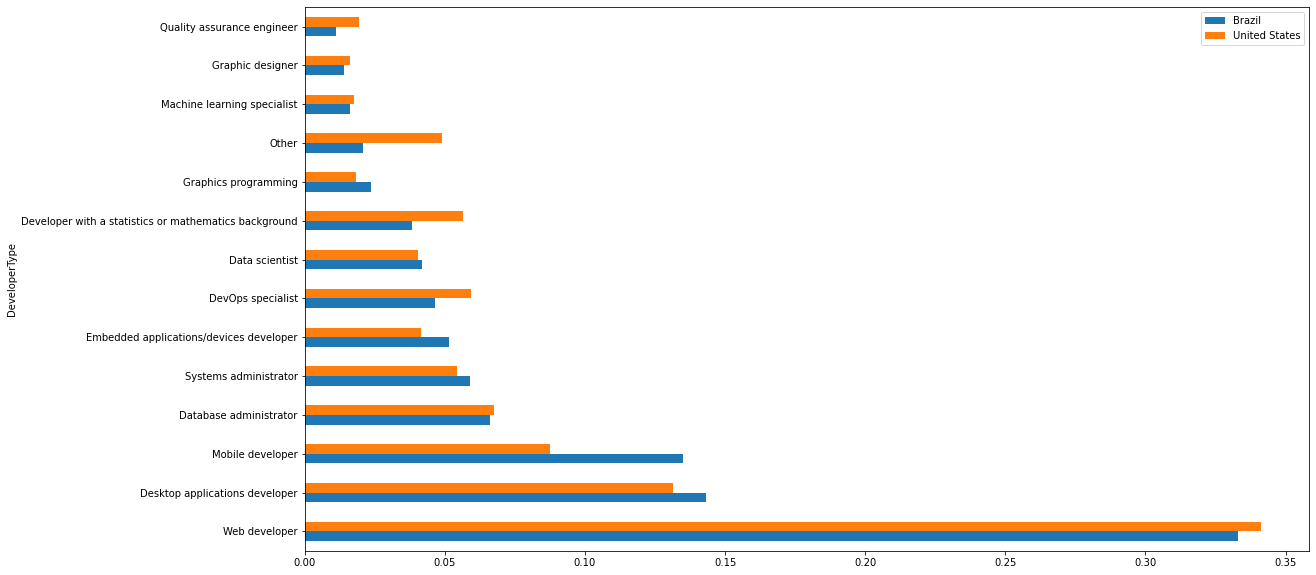

In [31]:
dev_type.plot(kind='barh', figsize=(18,10))

The main tree Developer Types in both countries are Web developer, Desktop applications developer and Mobile developer. The Second and third positions in Brazil has almost the same level, while in United States the difference between these two positions is more evident.   

Is there huge differences about formal education among the countries?

Text(0.5, 1.0, 'Brazilian Formal Education')

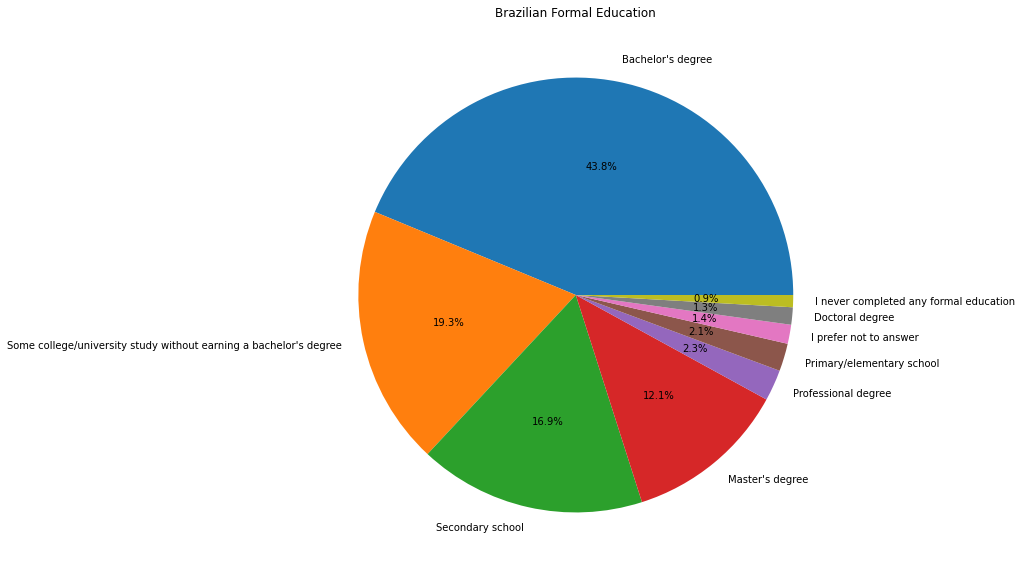

In [32]:
bra_formal_edu = df.loc[df['Country'] == 'Brazil']['FormalEducation'].value_counts()
bra_formal_edu = bra_formal_edu / bra_formal_edu.sum()
label_bra = list(bra_formal_edu.index)
plt.figure(figsize=(12,10))
plt.pie(bra_formal_edu, labels=label_bra, autopct='%1.1f%%',)
plt.title('Brazilian Formal Education')

Text(0.5, 1.0, 'American Formal Education')

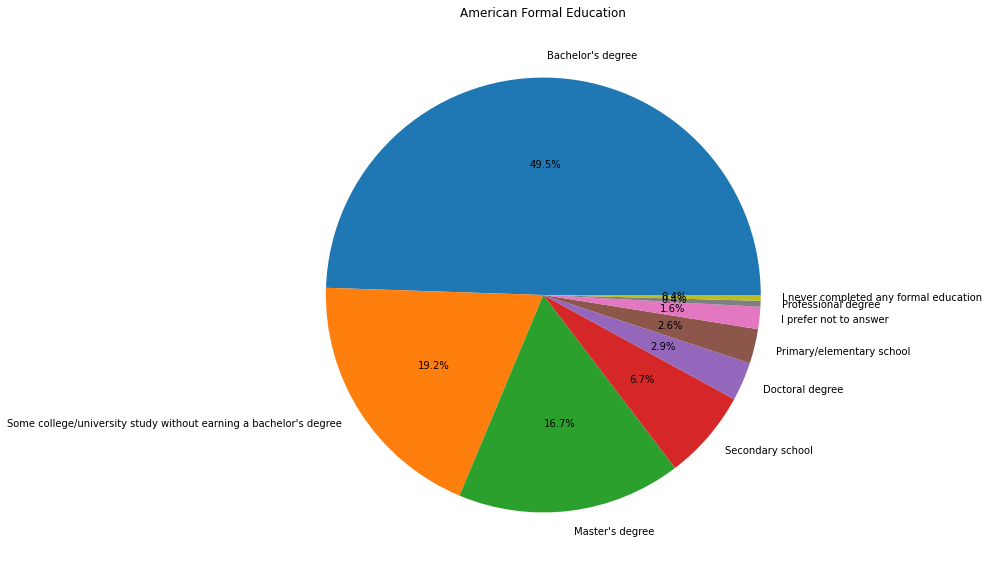

In [33]:
us_formal_edu = df.loc[df['Country'] == 'United States']['FormalEducation'].value_counts()
us_formal_edu = us_formal_edu / us_formal_edu.sum()
label_us = list(us_formal_edu.index)
plt.figure(figsize=(12,10))
plt.pie(us_formal_edu, labels=label_us, autopct='%1.1f%%',)
plt.title('American Formal Education')

Most developers in both countries has Bachelor's degree, however in United States it is almost 50%, while in Brazil it is near to 44%. The main difference is in third and fourth position. The US 16,7% has Master's degree and 6,7% Secondary school. In Brazil 16,9% has Secondary school and 12,1% Master's degree.

Which is the most popular course among the developers?

In [34]:
#Brazil Major undergrad
bra_majorundergrad = cl_df(df, 'MajorUndergrad', 'Brazil')
bra_majorundergrad['Brazil'] = bra_majorundergrad['Brazil'] / bra_majorundergrad['Brazil'].sum()
bra_majorundergrad.sort_values(by='Brazil', ascending=False, inplace=True)
bra_majorundergrad

,MajorUndergrad,Brazil
0,Computer science or software engineering,0.507365
2,Computer programming or Web development,0.153846
1,Computer engineering or electrical/electronics...,0.116203
4,"Information technology, networking, or system ...",0.072013
3,A non-computer-focused engineering discipline,0.024550
6,Mathematics or statistics,0.021277
8,A business discipline,0.018003
12,A natural science,0.016367
10,Something else,0.014730
5,Management information systems,0.013093


In [35]:
#US Major undergrad
us_majorundergrad = cl_df(df, 'MajorUndergrad', 'United States')
us_majorundergrad['United States'] = us_majorundergrad['United States'] / us_majorundergrad['United States'].sum()
us_majorundergrad.sort_values(by='United States', ascending=False, inplace=True)
us_majorundergrad


,MajorUndergrad,United States
2,Computer science or software engineering,0.468079
5,Computer engineering or electrical/electronics...,0.093005
8,A natural science,0.051921
10,Mathematics or statistics,0.046601
4,Computer programming or Web development,0.046305
0,A non-computer-focused engineering discipline,0.044926
12,A humanities discipline,0.039310
6,"Information technology, networking, or system ...",0.036847
7,Fine arts or performing arts,0.030936
3,A business discipline,0.030148


<AxesSubplot:ylabel='MajorUndergrad'>

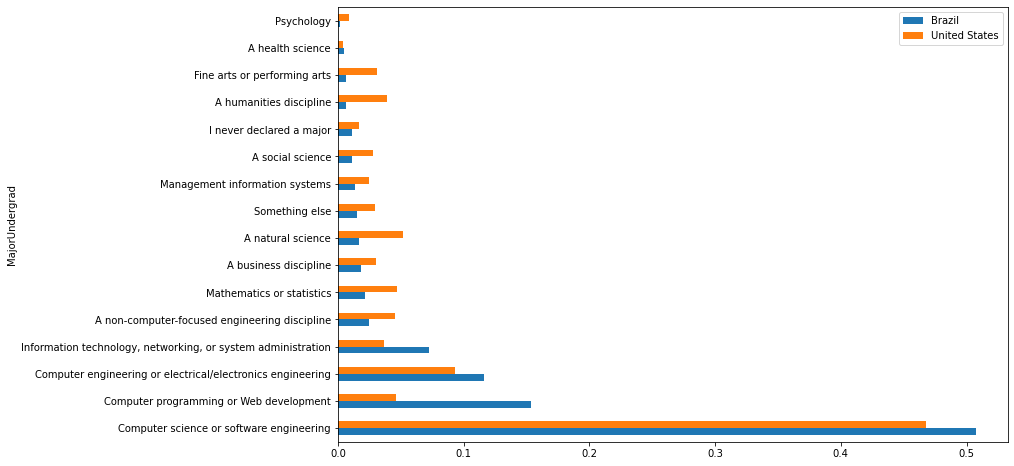

In [36]:
#Plot with results
majorundergad_compiled = pd.merge(bra_majorundergrad, us_majorundergrad, on='MajorUndergrad', how='inner').set_index('MajorUndergrad')
majorundergad_compiled.plot(kind='barh', figsize=(12,8))

Most of the students undergad in Computer science or software engineering in both countries. In Brazil the second position is Computer programming or web development and computer engineering or electrical/electronics engineering appers on the third position.